In [40]:
import pickle
with open('variaveis.pkl', 'rb') as f:
  X_train, Y_train, X_test, Y_teste = pickle.load(f)

In [41]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [42]:
X_train.shape, Y_train.shape

((676, 5), (676,))

In [43]:
X_test.shape, Y_teste.shape

((169, 5), (169,))

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Create the parameter grid based on the results of random search 
parameters = {
        'min_samples_split': range(1,10),
        'min_samples_leaf': range(1,5),
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [2,4,6,8,10,12]
        }

# Create the model
#xgboost_model = XGBClassifier(use_label_encoder=False,metric='multiclass', eval_metric='mlogloss',silent=True)
dt_model = DecisionTreeClassifier(random_state = 0)

# Best model
opt_model_dt = GridSearchCV(dt_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_dt.fit(X_train, Y_train)

print (opt_model_dt.best_estimator_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5; 1/432] START criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1
[CV 1/5; 1/432] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=0.794 total time=   0.0s
[CV 2/5; 1/432] START criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1
[CV 2/5; 1/432] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=0.800 total time=   0.0s
[CV 3/5; 1/432] START criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1
[CV 3/5; 1/432] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=0.830 total time=   0.0s
[CV 4/5; 1/432] START criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1
[CV 4/5; 1/432] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=0.770 total time=   0.0s
[CV 5/5; 1/432] START criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_s

In [46]:
arvore = DecisionTreeClassifier(criterion='entropy',max_depth=12, min_samples_split=1, random_state = 0)
arvore.fit(X_train, Y_train)
arvore

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=1,
                       random_state=0)

In [47]:
previsoes = arvore.predict(X_test)

In [48]:
confusion = pd.crosstab(Y_teste,previsoes, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted   0   1   2   3  All
Actual                        
0          39   5   0   0   44
1           2  38   0   0   40
2           2   0  35   3   40
3           0   1   0  44   45
All        43  44  35  47  169


In [49]:
# Accuracy
score1 = accuracy_score(Y_teste,previsoes)
#score2= accuracy_score(Y_train,predictions1)

print('Accuracy:{0:f}'.format(score1))

Accuracy:0.923077


In [50]:
# Report
print(classification_report(Y_teste,previsoes))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.86      0.95      0.90        40
           2       1.00      0.88      0.93        40
           3       0.94      0.98      0.96        45

    accuracy                           0.92       169
   macro avg       0.93      0.92      0.92       169
weighted avg       0.93      0.92      0.92       169



In [51]:
# Validate model using best model and cross validation
pecc_dt = cross_val_score(dt_model,  X_train, Y_train, cv = 10).mean()
pecc_dt

0.945324846356453

In [52]:
from sklearn import tree

In [53]:
X_train.columns

Index(['Q20__nota_português_2.ºperiodo', 'Q26__nota_mat_2.ºperiodo',
       'Q16_satisfação_com_notas_escolares', 'Q15_as_minhas_notas',
       'envolvimento_scoretotal'],
      dtype='object')

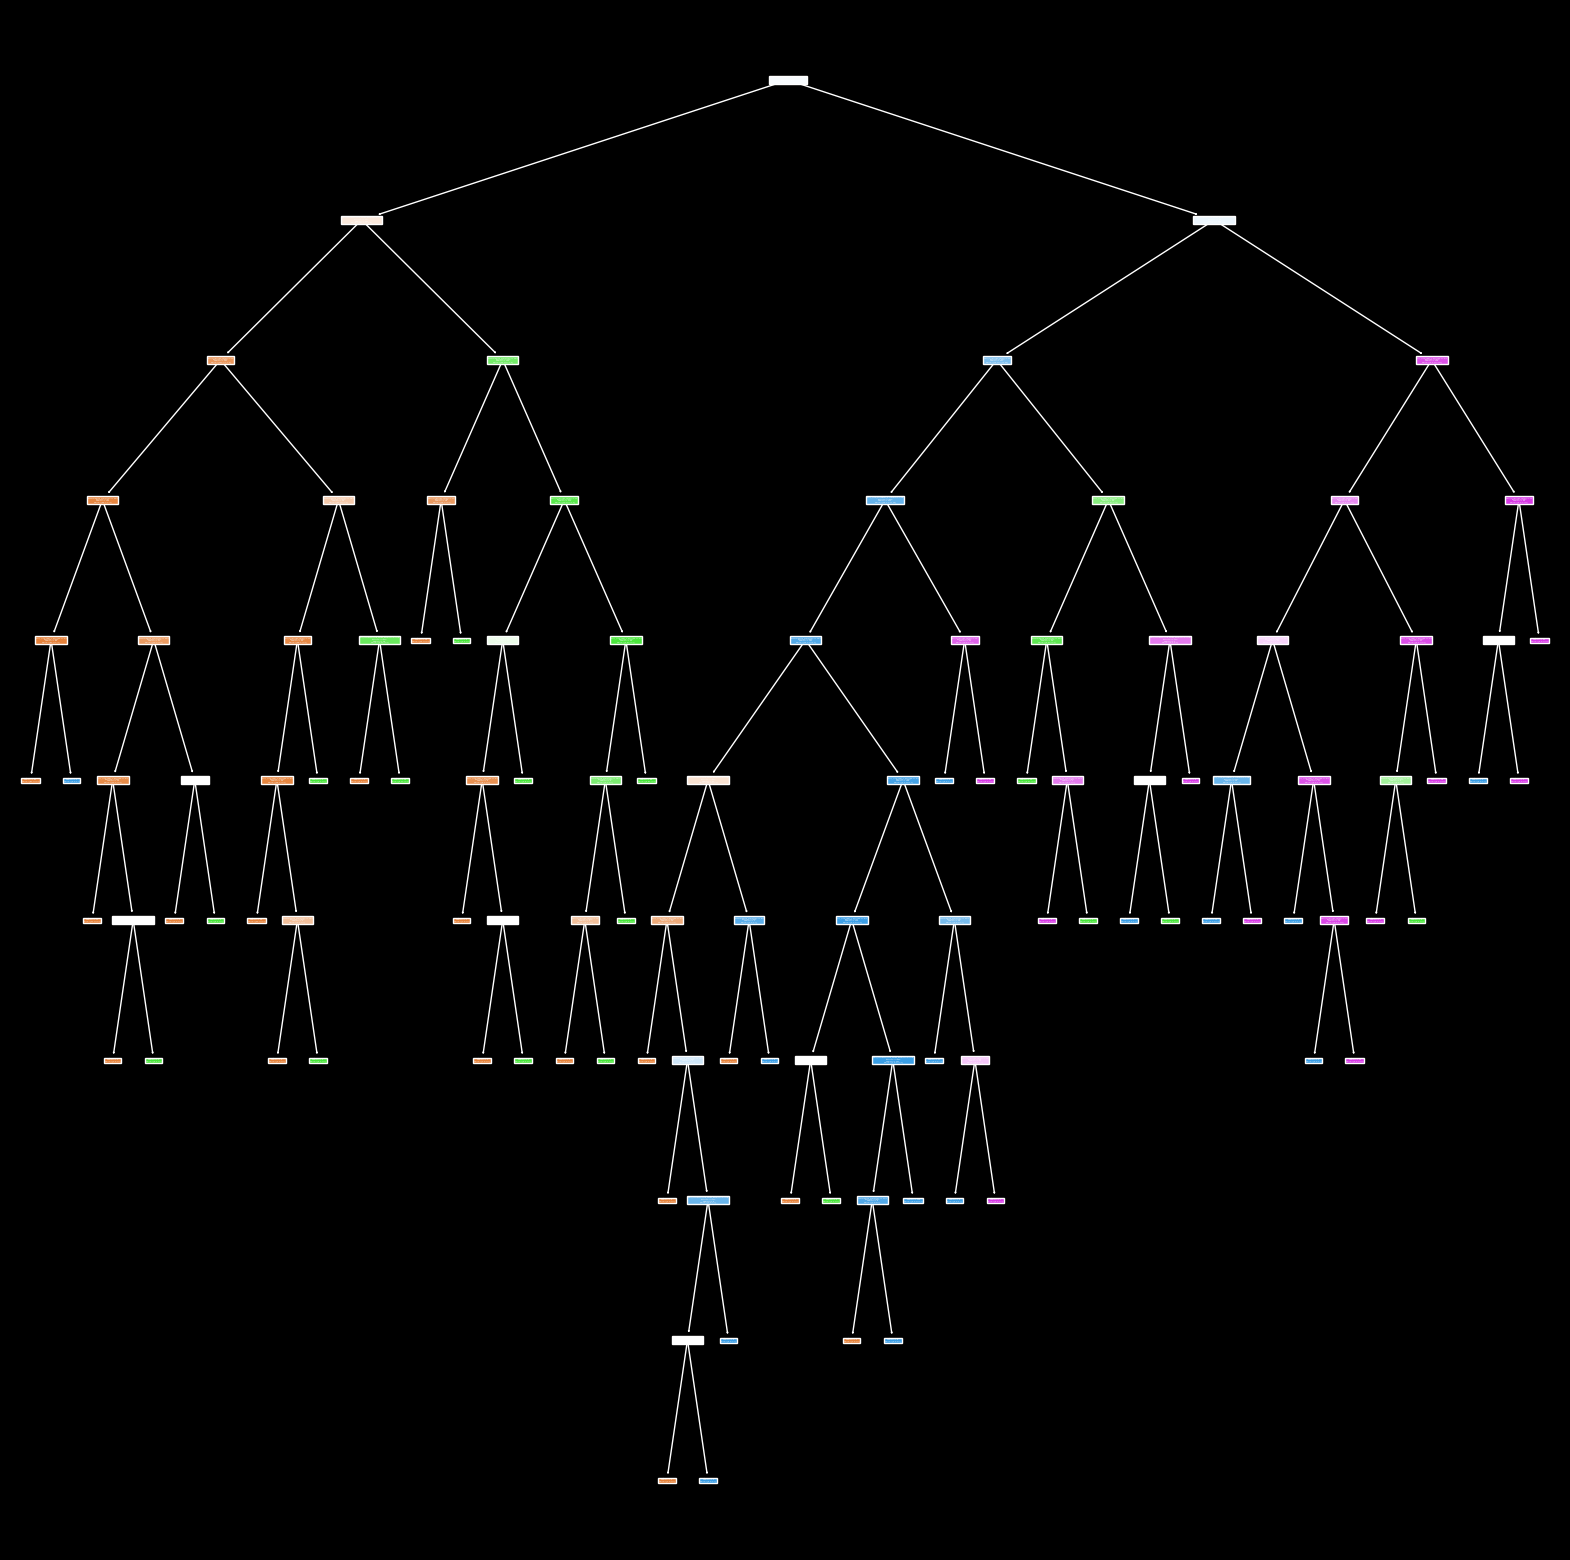

In [57]:
previsores = ['Q20__nota_português_2.ºperiodo', 'Q26__nota_mat_2.ºperiodo',
       'Q16_satisfação_com_notas_escolares', 'Q15_as_minhas_notas',
       'envolvimento_scoretotal']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore,feature_names=previsores, filled=True)
fig.savefig('arvore.png')